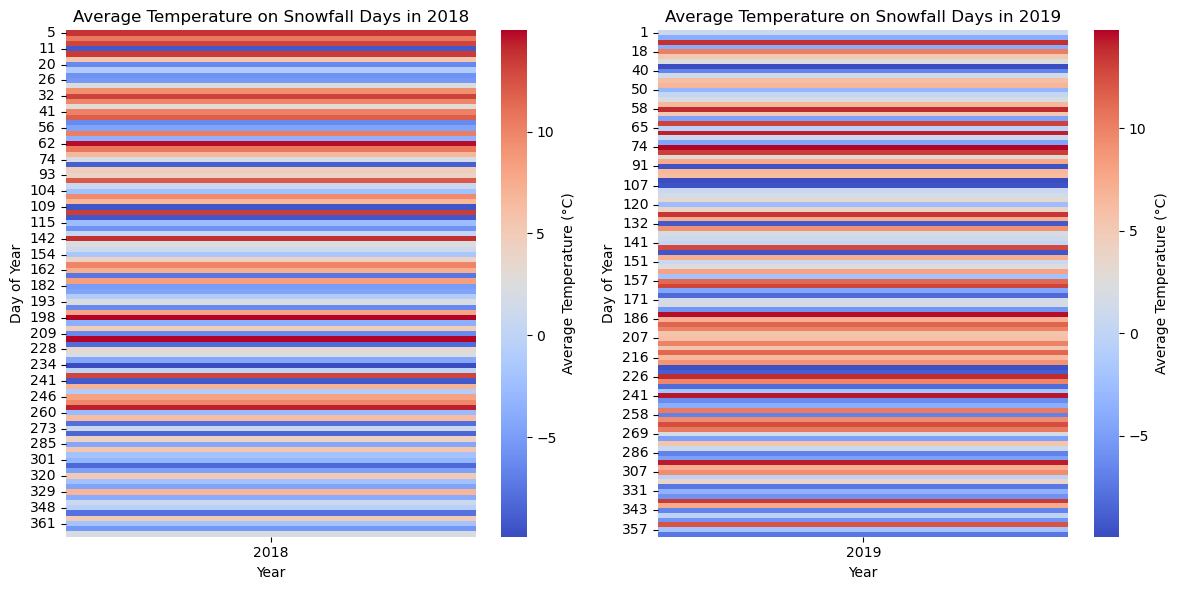

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data creation
data = {
    'date': pd.date_range(start='2018-01-01', end='2019-12-31', freq='D'),
    'temperature': np.random.uniform(low=-10, high=15, size=(730,)),  # Random temperatures
    'snowfall': np.random.choice([0, 1], size=(730,), p=[0.7, 0.3])  # 30% chance of snowfall
}

# Create DataFrame
df = pd.DataFrame(data)

# Filter data for snowfall days
snow_days = df[df['snowfall'] == 1].copy()
snow_days['year'] = snow_days['date'].dt.year
snow_days['day_of_year'] = snow_days['date'].dt.dayofyear

# Calculate average temperature on snowfall days
average_temps = snow_days.groupby(['year', 'day_of_year'])['temperature'].mean().reset_index()

# Create a pivot table for temperatures in 2018 and 2019
heatmap_data_2018 = average_temps[average_temps['year'] == 2018].pivot(index='day_of_year', columns='year', values='temperature')
heatmap_data_2019 = average_temps[average_temps['year'] == 2019].pivot(index='day_of_year', columns='year', values='temperature')

# Plotting heatmaps
plt.figure(figsize=(12, 6))

# Heatmap for 2018
plt.subplot(1, 2, 1)
sns.heatmap(heatmap_data_2018, cmap='coolwarm', cbar_kws={'label': 'Average Temperature (°C)'})
plt.title('Average Temperature on Snowfall Days in 2018')
plt.xlabel('Year')
plt.ylabel('Day of Year')

# Heatmap for 2019
plt.subplot(1, 2, 2)
sns.heatmap(heatmap_data_2019, cmap='coolwarm', cbar_kws={'label': 'Average Temperature (°C)'})
plt.title('Average Temperature on Snowfall Days in 2019')
plt.xlabel('Year')
plt.ylabel('Day of Year')

plt.tight_layout()
plt.show()
